**Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm,beta,binom,chi2
import pandas as pd
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

**Exercise 1**

In [2]:
df_1 = pd.read_csv('LLH_Ratio_2_data.txt', sep='\s+',header=None)
df_1.columns = ['X1','Y1']
X1 = df_1['X1'].values

df_2 = pd.read_csv('LLH_Ratio_2a_data.txt', sep='\s+',header=None)
df_2.columns = ['X2','Y2']
X2 = df_2['X2'].values

In [4]:
x_min , x_max = -1 , 1

def null(x, alpha, beta):
    func = lambda x: 1 + alpha*x + beta*x**2
    norm, _ = quad(func, x_min, x_max)
    pdf = 1 + alpha*x + beta*x**2
    normalized_pdf = pdf / norm
    return normalized_pdf

def alternative(x, alpha, beta, gamma):
    func = lambda x: 1 + alpha*x + beta*x**2 - gamma*x**5
    norm, _ = quad(func, x_min, x_max)
    pdf = 1 + alpha*x + beta*x**2 - gamma*x**5
    normalized_pdf = pdf / norm
    return normalized_pdf

def log_likelihood_null(x,alpha,beta):
    return np.sum(np.log(null(x,alpha,beta)),axis=0)

def log_likelihood_alternative(x,alpha,beta,gamma):
    return np.sum(np.log(alternative(x,alpha,beta,gamma)),axis=0)

**Data set 1**

Null Hypothesis

In [5]:
lambda_neg_LLH = lambda params: -log_likelihood_null(X1,params[0],params[1])

res = minimize(lambda_neg_LLH,x0=[0.56,0.99],bounds=((0,1),(0,1)),method='L-BFGS-B')

errors = np.sqrt(np.diag(res.hess_inv.todense()))

min_a , min_b = res.x

print(f'Alpha = {min_a:.05}, Beta = {min_b:.05} , -LLH = {res.fun:.10}')

Alpha = 0.29904, Beta = 0.66121 , -LLH = 13432.13955


Alternative Hypothesis

In [6]:
lambda_neg_LLH_2 = lambda params: -log_likelihood_alternative(X1,params[0],params[1],params[2])

res_2 = minimize(lambda_neg_LLH_2,x0=[0.29,0.66,0.1],bounds=((-1,1),(0,2),(0,1)),method='L-BFGS-B')

errors_2 = np.sqrt(np.diag(res_2.hess_inv.todense()))

min_a_2 , min_b_2 , min_g_2 = res_2.x

print(f'Alpha = {min_a_2:.05} , Beta = {min_b_2:.05} , Gamma = {min_g_2:.05} , -LLH = {res_2.fun:.6}')

Alpha = 0.32385 , Beta = 0.65676 , Gamma = 0.064355 , -LLH = 13431.4


In [7]:
diff = 2 * (res.fun - res_2.fun)
p_value = 1 - chi2.cdf(diff, df=1)

print(f'The double difference in LLH is {diff:.05} and the p-value is {p_value}')

The double difference in LLH is 1.4683 and the p-value is 0.22561881743886059


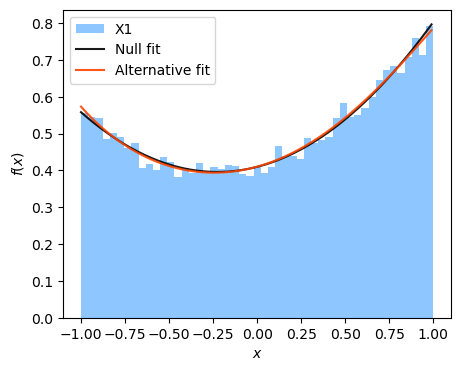

In [8]:
plt.figure(figsize = (5,4))

x_range = np.arange(-1,1,0.01)

plt.hist(X1,bins=np.linspace(-1,1,50),density=True,alpha=0.5,label = 'X1',color='dodgerblue')
plt.plot(x_range,null(x_range,min_a,min_b),alpha=0.9,label = 'Null fit',color='black')
plt.plot(x_range,alternative(x_range,min_a_2,min_b_2,min_g_2),alpha=0.9,label = 'Alternative fit',color='orangered')

plt.legend(loc = 'best',frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

**Data set 2**

Null Hypothesis

In [9]:
lambda_neg_LLH_3 = lambda params: -log_likelihood_null(X2,params[0],params[1])

res_3 = minimize(lambda_neg_LLH_3,x0=[0.56,0.99],bounds=((-1,1),(0,1)),method='L-BFGS-B')

errors_3 = np.sqrt(np.diag(res_3.hess_inv.todense()))

min_a_3 , min_b_3 = res_3.x

print(f'Alpha = {min_a_3:.05}, Beta = {min_b_3:.05} , -LLH = {res_3.fun:.06}')

Alpha = -0.042909, Beta = 0.57967 , -LLH = 13651.0


Alternative Hypothesis

In [10]:
lambda_neg_LLH_4 = lambda params: -log_likelihood_alternative(X2,params[0],params[1],params[2])

res_4 = minimize(lambda_neg_LLH_4,x0=[0.56,0.99,0.1],bounds=((-1,1),(0,2),(0,1)),method='L-BFGS-B')

errors_4 = np.sqrt(np.diag(res_4.hess_inv.todense()))

min_a_4 , min_b_4 , min_g_4 = res_4.x

print(f'Alpha = {min_a_4:.05} , Beta = {min_b_4:.05} , Gamma = {min_g_4:.05} , -LLH = {res_4.fun:.06}')

Alpha = 0.31783 , Beta = 0.58753 , Gamma = 0.92144 , -LLH = 13495.0


In [11]:
diff_2 = 2 * (res_3.fun - res_4.fun)
p_value = 1 - chi2.cdf(diff_2, df=1)

print(f'The double difference in LLH is {diff_2:.05} and the p-value is {p_value}')

The double difference in LLH is 311.98 and the p-value is 0.0


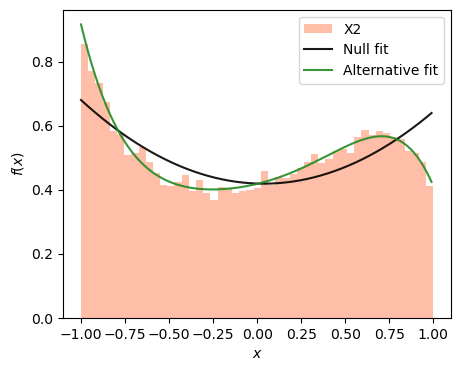

In [12]:
plt.figure(figsize = (5,4))

x_range = np.arange(-1,1,0.01)

plt.hist(X2,bins=np.linspace(-1,1,50),density=True,alpha=0.5,label = 'X2',color='coral')
plt.plot(x_range,null(x_range,min_a_3,min_b_3),alpha=0.9,label = 'Null fit',color='black')
plt.plot(x_range,alternative(x_range,min_a_4,min_b_4,min_g_4),alpha=0.9,label = 'Alternative fit',color='forestgreen')

plt.legend(loc = 'best',frameon = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()